In [ ]:
#Employee attrition prediction

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

In [6]:
#importing dataset.target variable is left
df=pd.read_csv("DS2_C5_S3_HR_Data_Practice.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
df.shape

(14999, 10)

In [9]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

## Task1

In [10]:
#Data Exploration and Visualization

In [11]:
#impact of salary on employee retention 

In [12]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [14]:
ct=pd.crosstab(index=df["left"],columns=df["salary"],normalize='columns')
ct

salary,high,low,medium
left,,,
0,0.933711,0.703116,0.795687
1,0.066289,0.296884,0.204313


<AxesSubplot:xlabel='salary', ylabel='count'>

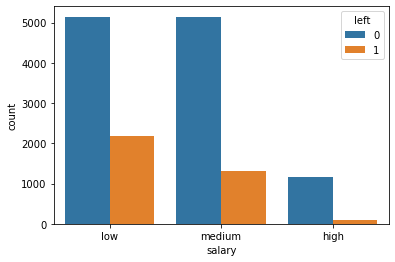

In [15]:
sb.countplot(data=df,x='salary',hue="left")

In [16]:
#count of employees left is high in low salaried ones

<AxesSubplot:xlabel='salary', ylabel='left'>

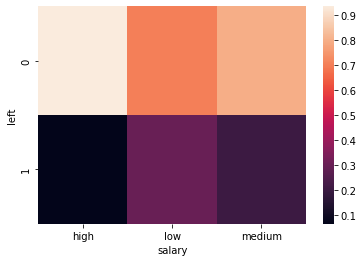

In [17]:
sb.heatmap(ct)

In [18]:
#high salaries employees have low attrition rate

In [19]:
#Department wise employee retention rate

In [20]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [21]:
ct=pd.crosstab(index=df["left"],columns=df["Department"],normalize="columns")
ct

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,0.777506,0.846252,0.734029,0.709066,0.855556,0.763403,0.780488,0.755072,0.751009,0.74375
1,0.222494,0.153748,0.265971,0.290934,0.144444,0.236597,0.219512,0.244928,0.248991,0.25625


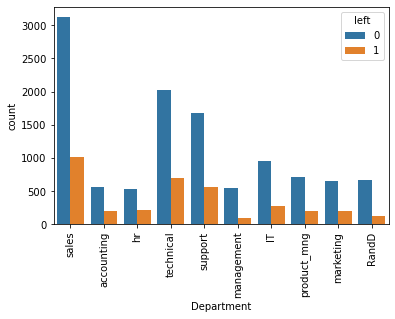

In [22]:
sb.countplot(data=df,x="Department",hue="left")
plt.xticks(rotation=90)
plt.show()

In [23]:
#count of employees left is highest in sales department

<AxesSubplot:xlabel='Department', ylabel='left'>

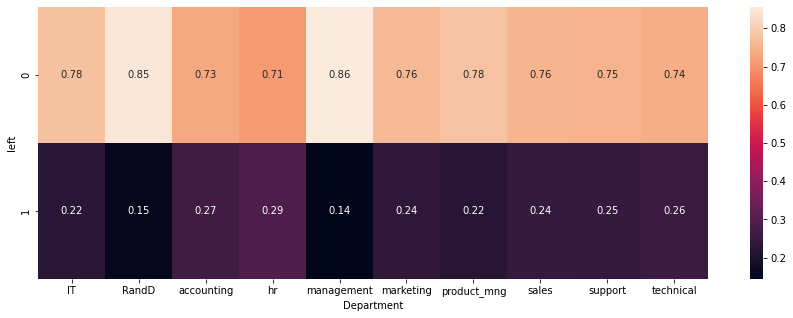

In [24]:
plt.figure(figsize=(15,5))
sb.heatmap(ct,annot=True)

In [25]:
#attrition rate is low in management and R&D departments

## Task2

In [26]:
#checking for null values

In [27]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [28]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [29]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [30]:
#there are no null or noise data 

In [33]:
#converting category data into numerical by label encoding 

In [34]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [35]:
c=df.select_dtypes(include="object").columns.to_list()
df[c]=df[c].astype("category")

In [36]:
df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department               category
salary                   category
dtype: object

In [37]:
#label encoding
encoder=LabelEncoder()

In [38]:
for i in c:
    df[i]=encoder.fit_transform(df[i])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


<AxesSubplot:>

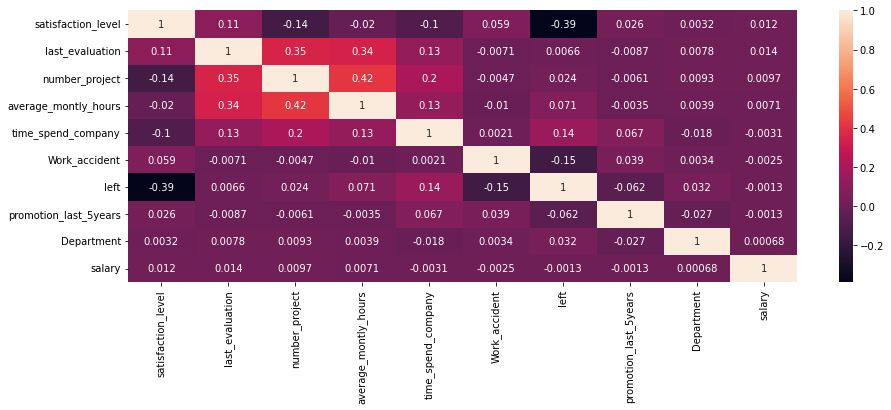

In [39]:
#checking the correlation 
plt.figure(figsize=(15,5))
c=df.corr()
sb.heatmap(c,annot=True)

In [ ]:
#based on correlation matrix,top features are satistaction_level,time spent in company and work accident since they are highly correlated with target variable

## Task3

In [337]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [338]:
#target variable is 'left' and consodering others as independent features
y=df["left"]
#x=df.loc[:,df.columns!="left"]
x=df[["satisfaction_level","Department","salary"]]
#x=df[["satisfaction_level","Work_accident"]]

In [339]:
#scaling all independent features

In [340]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [341]:
#train test split in ratio of 70:30

In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [343]:
#model
model=LogisticRegression().fit(x_train,y_train)

In [344]:
#training accuracy
model.score(x_train,y_train)

0.7713115534812839

In [345]:
#test accuracy
model.score(x_test,y_test)

0.7731111111111111

In [346]:
#slope
model.coef_[0]

array([-0.95306308,  0.1106455 , -0.00230473])

In [347]:
#intercept
model.intercept_

array([-1.37985042])

In [348]:
y_pred=model.predict(x_test)

In [349]:
#left actual and predicted
df_y=pd.DataFrame({"actual":y_test,"predicted":y_pred},columns=["actual","predicted"])
df_y

,actual,predicted
2463,0,0
6579,0,0
9578,0,0
8174,0,0
20,1,1
...,...,...
9433,0,0
2533,0,0
13375,0,0
739,1,1


## Task4

In [350]:
#confusion matrix
tn,fp,fn,tp=met.confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(3175, 239, 782, 304)

In [351]:
#calculating metrics for our model

In [352]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [353]:
#recall
recall_score(y_test,y_pred)

0.27992633517495397

In [354]:
#F1 score
f1_score(y_test,y_pred)

0.3732351135666052

In [355]:
#accuracy
accuracy_score(y_test,y_pred)

0.7731111111111111

In [356]:
#precision
precision_score(y_test,y_pred)

0.5598526703499079

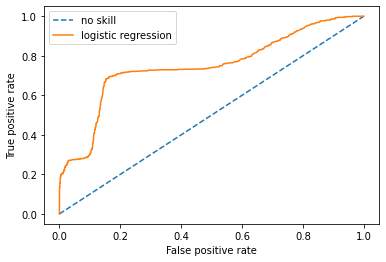

In [359]:
#visualizing  the roc curve
ns_prob=[0 for i in range(len(y_test))]
lr_prob=model.predict_proba(x_test)[:,1]

ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label="no skill")
plt.plot(lr_fpr,lr_tpr,label="logistic regression")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [360]:
roc_auc_score(y_test,lr_prob)

0.7477571768721795

In [358]:
#here as we can from this false postive rate vs true postive rate roc curve,
#our logistic regression area under curve is 0.748 which indicates it is  a good model